Project 2

In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [170]:
data = pd.read_csv('insurance.csv')

In [6]:
# Shape of the data
data.shape

(1338, 7)

In [7]:
# Data type of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
#Checking the presence of missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [171]:
#5 point summary of numerical attributes
#1 -    Min  Max   AVG
#  age    18   64    39
#  bmi   15.9  53.1 30.6 
# charges 13270 1121 63770
#2 - Attributes does not have good correlation with each other.
#3 - No missing values exist in dataset
#4 - 4 catagorical and 3 Continous veriable
#5 - charge - 1.515880  - Most skewed out of all categorical veriable

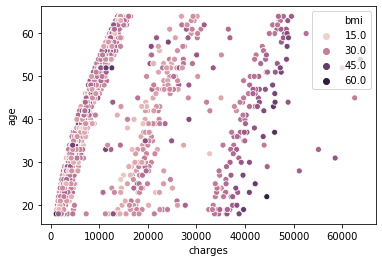

In [172]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.scatterplot(x = 'charges', y ='age', data = data, hue = 'bmi')

In [173]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns
from scipy.stats import skew
data.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

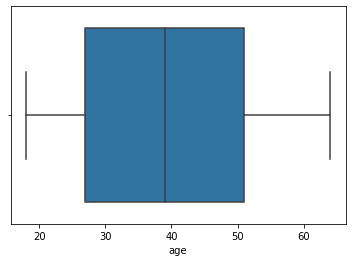

In [187]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns
sns.boxplot(x='age',data=data)
#No outliers are present

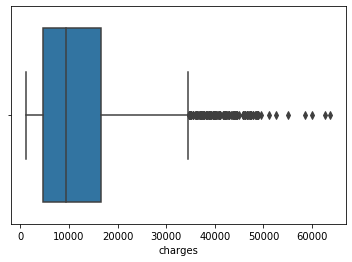

In [189]:
sns.boxplot(x = 'charges',data=data)
#found a lot of outliers

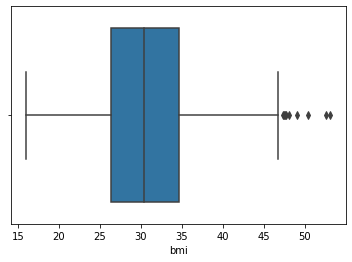

In [188]:
sns.boxplot(x = 'bmi',data=data)
#found a some outliers

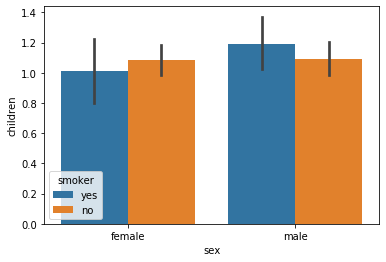

In [179]:
#Distribution of categorical columns (include  children)  
sns.barplot(x = 'sex',y = 'children', data = data, hue ='smoker')

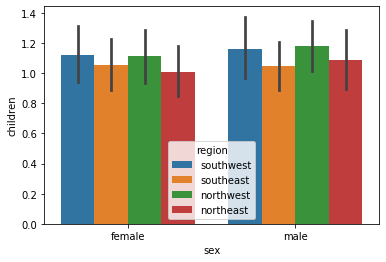

In [176]:
#Distribution of categorical columns (include  children)  
sns.barplot(x = 'sex',y = 'children', data = data, hue ='region')

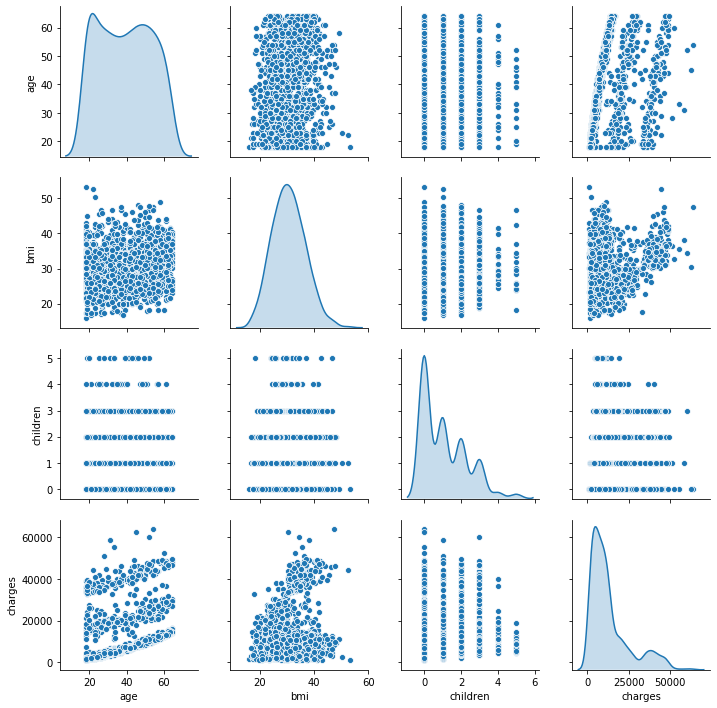

In [146]:
#Pair plot that includes all the columns of the data  frame
sns.pairplot(data,diag_kind='kde')

In [110]:
#Do charges of people who smoke differ significantly  from the people who don't?  
data_smoker = data.loc[(data['smoker'] == "yes")]
data_non_smoker = data.loc[(data['smoker']=='no')]
smoker_charges = data_smoker["charges"]
non_smoker_charges = data_non_smoker["charges"]
#H0: smoker_charges- non_smoker_charges = 0
#HA: smoker_charges- non_smoker_charges != 0
t_statistic, p_value  =  stats.ttest_ind(smoker_charges,non_smoker_charges)
print('p_value',p_value)
print('p_value is near to 0, which is less then alfa(level of significance), Means reject Null Hypothisys - smoker_charges is significantly greater then non_smoker_charges')

p_value 8.271435842177219e-283
p_value is near to 0, which is less then alfa(level of significance, Means reject Null Hypothisys - smoker_charges is significantly greater then non_smoker_charges


In [114]:
#Does bmi of males differ significantly from that of  females?  
data_male = data.loc[(data['sex'] == 'male')]
data_female = data.loc[data['sex']=='female']
male_bmi = data_male['bmi']
female_bmi = data_female['bmi']
#H0: male_bmi- female_bmi = 0
#HA: male_bmi- female_bmi != 0
t_statistic, p_value = stats.ttest_ind(male_bmi,female_bmi)
print('p_value',p_value)
print('p_value is 0.08997637178984932, which is greater then alfa(level of significance), Means fail to reject Null Hypothisys - male_bmi is not significantly greater then female_bmi')

p_value 0.08997637178984932
p_value is 0.08997637178984932, which is greater then alfa(level of significance), Means fail to reject Null Hypothisys - male_bmi is not significantly greater then female_bmi


In [194]:
# Is the proportion of smokers significantly different  in different genders?  
smoker_array = np.array([[547,115],[517,159]])
stats.chi2_contingency(smoker_array)
#We can say - there is a significance differance in no of smoker in males and females

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [195]:
#Is the distribution of bmi across women with no  children, one child and two children, the same ? 
data_female = data.loc[data['sex']=='female']
child_0 = data_female.loc[data['children']==0]
child_1 = data_female.loc[data['children']==1]
child_2 = data_female.loc[data['children']==2]
f_child_0 = child_0['bmi']
f_child_1 = child_1['bmi']
f_child_2 = child_2['bmi']
#H0: f_child_0 = f_child_1 = f_child_2
#HA: any one of them is different
t_statistic, p_value  =  stats.f_oneway(f_child_0,f_child_1,f_child_2)
print('p_value', p_value)
print('p_value is 0.7158579926754841, which is greater then alfa(level of significance), Means fail to reject Null Hypothisys - There is no significant difference between BMI, wheather there is 0,1 or 3 children')

p_value 0.7158579926754841
p_value is 0.7158579926754841, which is greater then alfa(level of significance), Means fail to reject Null Hypothisys - There is no significant difference between BMI, wheather there is 0,1 or 3 children
